In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets
from scipy.stats import chi2_contingency

In [248]:
df=pd.read_csv("Project2-DataSets.csv")

In [249]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


How to handle age in decimal  
201 records N/A to be replaced with mean value 





In [250]:
# Finding the null values in all columns
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [251]:
# Replacing the null values in 'bmi' column with it's mean value

df.fillna(df["bmi"].mean(),axis=1, inplace = True)
df["bmi"]=df.bmi.round(decimals=1)

In [252]:
# dropping the gender record = Other being the single won't affect the data analysis
#df.gender.value_counts()
df = df[df['gender'] != 'Other']

In [255]:
# Discretize with respective equal-width bin
df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5))
df['avg_glucose_level_binned'] = pd.cut(df['avg_glucose_level'], np.arange(0, 301, 10))
df['bmi_binned'] = pd.cut(df['bmi'], np.arange(0, 101, 5))

## Task 1:
Visualize Age and BMI frequency


In [289]:
age_Bmi = pd.crosstab(df.age_binned, df.bmi_binned)
age_Bmi

bmi_binned,"(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(90, 95]","(95, 100]"
age_binned,,,,,,,,,,,,,,,,
"(0, 5]",25,205,71,15,4,0,0,0,0,0,0,0,0,0,0,0
"(5, 10]",11,121,31,17,6,1,0,0,0,0,0,0,0,0,0,0
"(10, 15]",3,54,102,50,17,5,5,1,0,0,0,0,0,0,0,0
"(15, 20]",0,25,115,78,33,13,11,4,0,1,0,0,0,0,0,1
"(20, 25]",0,15,94,78,35,30,8,3,2,1,1,0,0,1,0,0
"(25, 30]",0,12,84,95,37,28,10,5,2,2,1,0,0,0,0,0
"(30, 35]",0,7,64,110,65,36,30,10,5,2,0,0,0,0,0,0
"(35, 40]",1,2,67,108,76,50,26,11,1,2,0,0,0,0,1,0
"(40, 45]",0,3,74,112,85,49,28,11,8,3,0,0,1,0,0,0


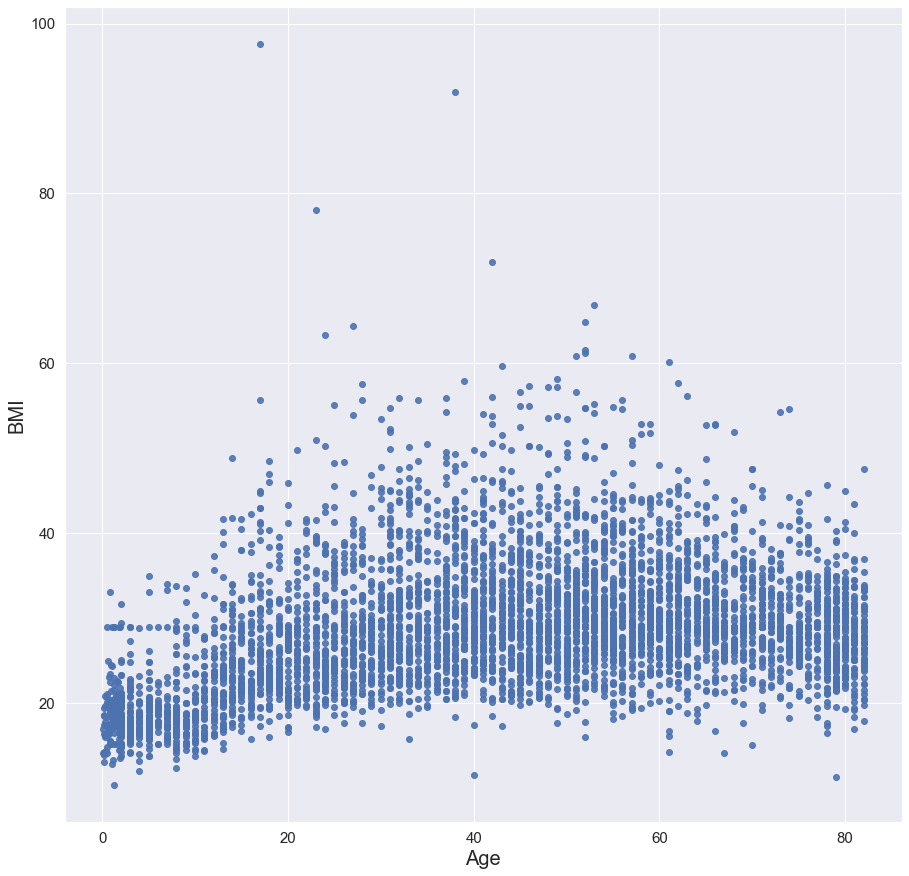

In [256]:
plt.figure(figsize=(15,15))
plt.plot(df['age'], df['bmi'], 'o', alpha=.9)
plt.ylabel('BMI',fontsize= 20)
plt.xlabel('Age',fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

## Task 2:
Find a correlation between Age and Gender

In [257]:
pd.crosstab(df.age_binned, df.gender)

gender,Female,Male
age_binned,,
"(0, 5]",155,165
"(5, 10]",80,107
"(10, 15]",116,121
"(15, 20]",167,114
"(20, 25]",180,88
"(25, 30]",191,85
"(30, 35]",210,119
"(35, 40]",220,125
"(40, 45]",242,132


<Figure size 3600x3600 with 0 Axes>

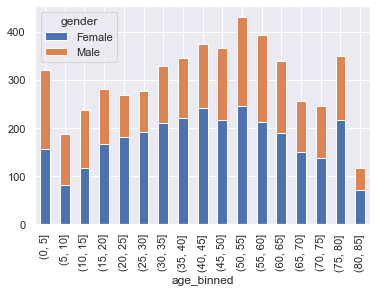

In [258]:
plt.figure(figsize=(50,50))
age_Gender = pd.crosstab(df.age_binned, df.gender)
age_Gender.plot.bar(stacked=True)

In [259]:
chi2_contingency(pd.crosstab(df.age, df.gender))

(164.36591313737054,
 0.00011596513466733665,
 103,
 array([[ 1.17204932,  0.82795068],
        [ 1.75807399,  1.24192601],
        [ 2.93012331,  2.06987669],
        [ 2.93012331,  2.06987669],
        [ 1.17204932,  0.82795068],
        [ 1.75807399,  1.24192601],
        [ 2.93012331,  2.06987669],
        [ 2.34409865,  1.65590135],
        [ 2.93012331,  2.06987669],
        [ 2.34409865,  1.65590135],
        [ 2.93012331,  2.06987669],
        [ 2.93012331,  2.06987669],
        [ 4.6881973 ,  3.3118027 ],
        [ 2.34409865,  1.65590135],
        [ 4.6881973 ,  3.3118027 ],
        [ 4.6881973 ,  3.3118027 ],
        [ 1.75807399,  1.24192601],
        [ 3.51614797,  2.48385203],
        [ 2.34409865,  1.65590135],
        [ 4.6881973 ,  3.3118027 ],
        [ 3.51614797,  2.48385203],
        [ 5.27422196,  3.72577804],
        [ 4.6881973 ,  3.3118027 ],
        [32.23135643, 22.76864357],
        [26.95713447, 19.04286553],
        [19.92483852, 14.07516148],
        [38.

#### The second value of the above output '0.00011596513466733665' represents the p-value of the test. As evident, the p-value is less than 0.05, hence we reject the null hypothesis that the Age is not associated with the Gender. 

## Task 3:
Find a correlation between hypertension and Avg Glucose level

In [272]:
df['hypertension_txt'] = np.where(df['hypertension'] == 0, 'No', 'Yes')
pd.crosstab(df.avg_glucose_level_binned, df.hypertension_txt)

hypertension_txt,No,Yes
avg_glucose_level_binned,,
"(50, 60]",198,22
"(60, 70]",501,35
"(70, 80]",713,63
"(80, 90]",818,55
"(90, 100]",669,57
"(100, 110]",467,39
"(110, 120]",319,35
"(120, 130]",190,9
"(130, 140]",94,5


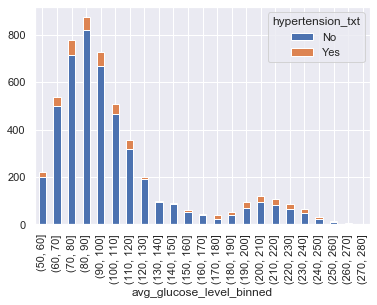

In [277]:
glucose_Hyper = pd.crosstab(df.avg_glucose_level_binned, df.hypertension_txt)
glucose_Hyper.plot.bar(stacked=True)

In [276]:
chi2_contingency(pd.crosstab(df.hypertension,df.avg_glucose_level))

(4182.017990178018,
 0.011668314042800254,
 3977,
 array([[0.90252496, 0.90252496, 0.90252496, ..., 0.90252496, 0.90252496,
         0.90252496],
        [0.09747504, 0.09747504, 0.09747504, ..., 0.09747504, 0.09747504,
         0.09747504]]))

#### The second value of the above output '0.011668314042800254' represents the p-value of the test. As evident, the p-value is less than 0.05, hence we reject the null hypothesis that the Avg Glucose level is not associated with the hypertension but the assoiciation seems quie weak

## Task 4:
Find a correlation between Marital status and Smoking status

In [263]:
pd.crosstab(df.smoking_status, df.ever_married)

ever_married,No,Yes
smoking_status,,
Unknown,901,643
formerly smoked,146,738
never smoked,530,1362
smokes,179,610


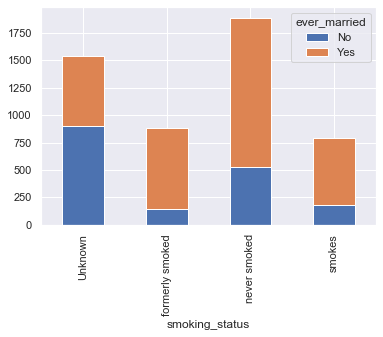

In [279]:
smoker_MarrStatus = pd.crosstab(df.smoking_status, df.ever_married)
smoker_MarrStatus.plot.bar(stacked=True)

In [280]:
chi2_contingency(pd.crosstab(df.smoking_status,df.ever_married))

(600.3302150889309,
 8.54686655490199e-130,
 3,
 array([[ 530.68389117, 1013.31610883],
        [ 303.83715013,  580.16284987],
        [ 650.293991  , 1241.706009  ],
        [ 271.1849677 ,  517.8150323 ]]))

#### The second value of the above output '8.54686655490199e-130' represents the p-value of the test. As evident, the p-value is less than 0.05, hence we reject the null hypothesis that the Marital status level is not associated with the Smoking status. It seemed that majority of the married people never somked or quitted the smoking.

## Task 5:
Find if there is any relation between work type and heart disease 

In [297]:
work_HeartDisease = pd.crosstab(df.work_type, df.heart_disease)
work_HeartDisease

heart_disease,0,1
work_type,,
Govt_job,621,36
Never_worked,22,0
Private,2766,158
Self-employed,738,81
children,686,1


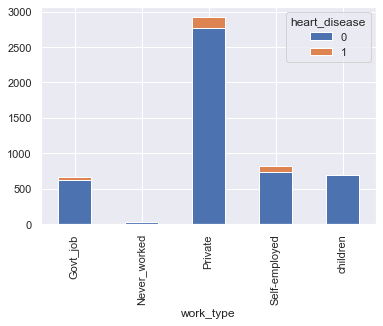

In [298]:
work_HeartDisease.plot.bar(stacked=True)

In [299]:
chi2_contingency(pd.crosstab(df.work_type,df.heart_disease))

(70.68948326404308,
 1.6233618322023935e-14,
 4,
 array([[6.21507340e+02, 3.54926600e+01],
        [2.08115091e+01, 1.18849090e+00],
        [2.76603876e+03, 1.57961245e+02],
        [7.74755725e+02, 4.42442748e+01],
        [6.49886671e+02, 3.71133294e+01]]))

#### As per Chi Squared observation there is not much correlation between work type and heart disease. However, it seems that self employed people are relatively more prone to heart disease. 

## Task 6:
Find the frequency of Smoking status in the form of Histogram

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


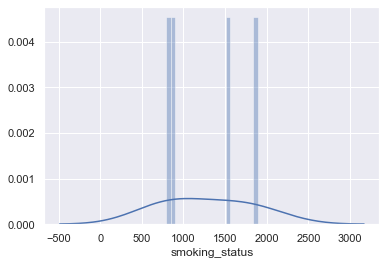

In [331]:
print(df['smoking_status'].value_counts())
sns.distplot(df['smoking_status'].value_counts(), bins=20)

## Task 7:
What is Min, Max and Avg glucose level

In [333]:
df['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

## Task 8:
Find the frequency of Males and females in the data

In [334]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

## Task 9:
Find if marital status is related to smoking status

It seemed that majority of the married people never somked or quitted the smoking. However, as seen earlier in Task 4 that there smoking status is somewhat related to marital status.

## Task 10:
What is the most prominent and relevant factor causing the stroke?

Diabetes is the major risk factors for stroke occurrence and prediabetes patients have an increased risk of stroke.  
Higher proportion of patients who suffered from hypertension or heart disease experienced a stroke, all else being equal.

In [357]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = df.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

In [346]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

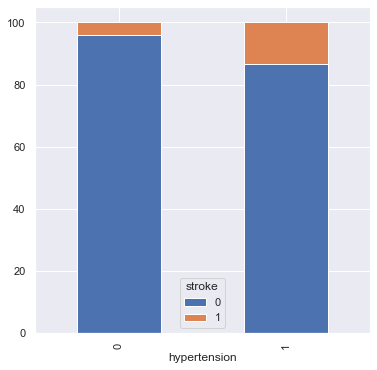

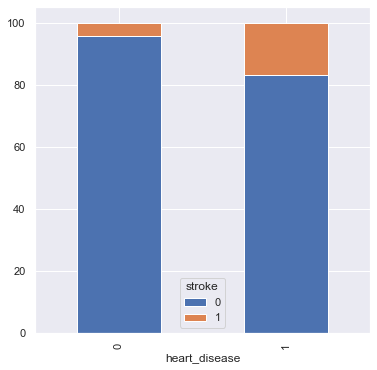

In [353]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

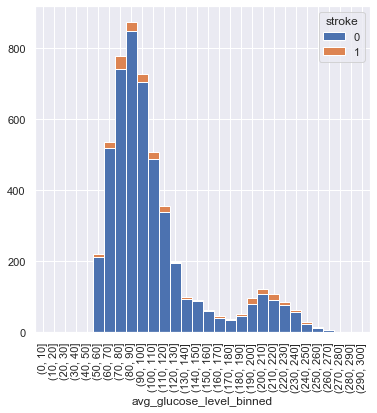

In [358]:
get_stacked_bar_chart('avg_glucose_level_binned')

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2924  45.510602
Self-employed   819  60.201465
children        687   6.841339

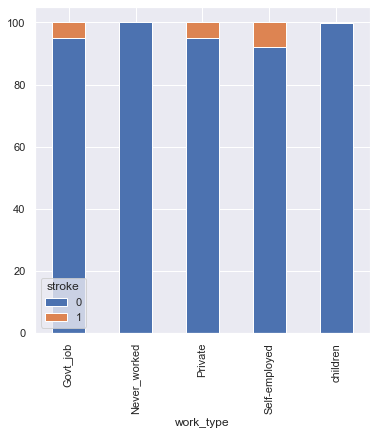

In [355]:
get_100_percent_stacked_bar_chart('work_type')
df.groupby(['work_type'])[['age']].agg(['count', 'mean'])